## $\color{red}{\text{Lecture Overview}}$
1. **Classification Techniques**
2. **Artificial Neural Networks (MLP)**
2. **Developing the Analytic Task**
3. **Data Transformation**
4. **Data Modeling**
5. **Model Comparison**

## $\color{red}{\text{Artificial Neural Networks (ANN)}}$

an ANN is a fundamental building block of LLM/Transformer AI Models like ChatGPT

### $\color{blue}{\text{An Intuition}}$
- Imitate biological activities in the brain
    - **Neurons** are connected by **synapses** and learn from experience
    - Neurons **fire** after accumulated information is greater than a threshold

### $\color{blue}{\text{Advantages of ANNs}}$
   
- High predictive performance
- Captures complex relationships between predictors and outcome variable
- Used for classification and regression tasks

### $\color{blue}{\text{Disadvantages of ANNs}}$

- High tendency to overfit data
- Difficult to interpret - "black box"

## $\color{red}{\text{Concepts of Neural Networks}}$

### $\color{blue}{\text{Architectures: Feed Forward Neural Network}}$

- Neural networks are composed of **input layers**, **hidden layers** and **output layers**
    - **Input layers** accepts predictor value
    - Layers between the input and output layers are known as **hidden layers**
    - Iput layers are joined to hidden laryers through **weights**
    - The last layer is called the **output layer**
- The objective is for the model to learn the weights

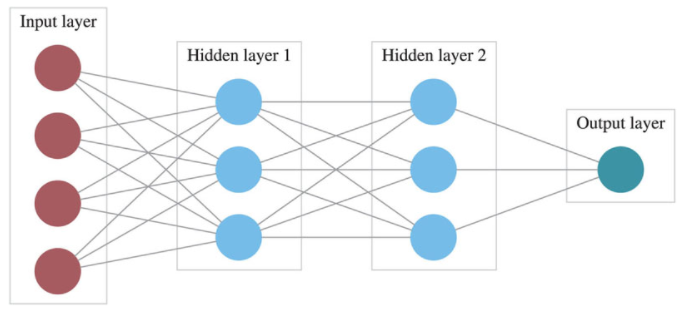

### $\color{blue}{\text{Computations in Neural Networks}}$


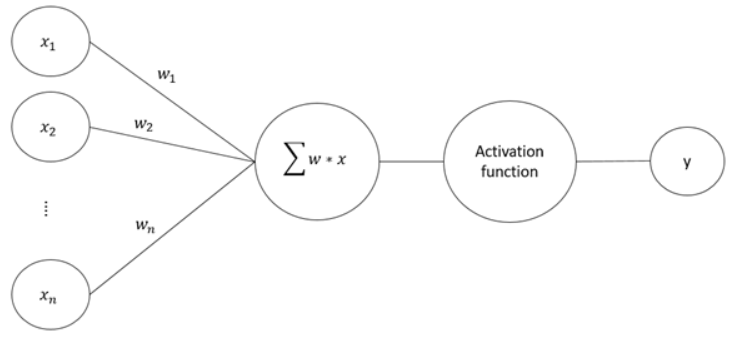

An activation function could be a classification or regression function.

## $\color{red}{\text{Import Required Packages}}$

In [41]:
import matplotlib.pylab as plt
%matplotlib inline

import numpy as np
import pandas as pd

## $\color{red}{\text{Import Data}}$

In [42]:
bank_df = pd.read_csv('/Users/dB/Documents/repos/github/bint-capstone/data-sources/UniversalBank.csv')

In [43]:
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## $\color{red}{\text{Analytic Task}}$
1. Using the bank_df data, build an **ANN** to predict **Personal Loan**
2. Perform data transformation methods wherever needed
3. Perform data visualization tasks to develop a preliminary understanding of **Personal Loan**
4. Develop a model to predict **Personal Loan**
5. Assess the robustness of the model
6. Interpret the model for insights

## $\color{red}{\text{Data Transformation}}$

### $\color{blue}{\text{Deletion and Replacing}}$
1. Identify and remove ID and other variables that does not contribute to the models
2. Fix spaces in variable names
    - If a column name has a space, replace the space with an underscore (_)
3. Check to see if the procedures worked

In [44]:
# Delete the ID and ZIP code columns
drop_vars = ['ID', 'ZIP Code']
bank_new = bank_df.drop(drop_vars, axis=1)

# Replace space with underscore in column names
bank_new.columns = bank_new.columns.str.replace(' ', '_')
# bank_new.head()

### $\color{blue}{\text{Recoding}}$

1. Change the **Education** variable to be type "category"
    - Some variables appear numeric but they are not
2. Rename the values (1,2,3) of the **Education** variable to the following:
    - 1 = Undergrad
    - 2 = Graduate
    - 3 = Professional
3. View the first five (5) observations of the data

In [45]:
# Change "Education" column as categorical
bank_new['Education'] = bank_new['Education'].astype('category')

# Rename "Education" values of 1, 2 and 3 to "Undergrad", "Graduate" and "Professional"
categories = {1:'Undergrad', 2:'Graduate', 3:'Professional'}
bank_new['Education'] = bank_new.Education.cat.rename_categories(categories)

# First five observations
# bank_new.head()

### $\color{blue}{\text{Missing Value Analysis}}$

1. Check the extent to which variables have missing observations
2. If variables are missing, then imputation should be performed

In [46]:
# Function to compute missing values
def percent_missing(data):
    return data.isnull().sum().divide(len(data)).sort_values(ascending=False)

# Using the function
percent_missing(bank_new).head()

Age           0.0
Experience    0.0
Income        0.0
Family        0.0
CCAvg         0.0
dtype: float64

### $\color{blue}{\text{Data Partitioning}}$

1. Identify dependent and independent variables
2. Partition the data such that 80% is used for training and 20% is used for testing

In [47]:
from sklearn.model_selection import train_test_split

# Independent variables to be used in the model
dep_variable = bank_new['Personal_Loan']
ind_variable = bank_new.drop('Personal_Loan', axis=1)

# Partition data into training (80%) and testing (20%)
train_X, test_X, train_y, test_y = train_test_split(ind_variable, dep_variable, test_size=0.2, random_state=100)

### $\color{blue}{\text{Dummy Variables}}$
1. Replace categorical data with the mean of the dependent variable - rather than the standard dummy variable

In [48]:
# !pip install feature_engine
from feature_engine.encoding import MeanEncoder

mean_enc = MeanEncoder().fit(train_X, train_y)

# Obtain new training and testing data with categorical variables replaced by
# the mean of the dependent variable
new_train = mean_enc.transform(train_X)
new_test = mean_enc.transform(test_X)

### $\color{blue}{\text{Standardization}}$

1. Standardize data for models

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(new_train)

bank_std_train = pd.DataFrame(scaler.transform(new_train), columns=new_train.columns)
bank_std_test = pd.DataFrame(scaler.transform(new_test), columns=new_test.columns)

## $\color{red}{\text{Data Modeling}}$

### $\color{blue}{\text{ANN: MultiLayer Percepton (MLP)}}$

1. Fit an MLP model on the training data

In [50]:
from sklearn.neural_network import MLPClassifier

# Fit model
mlp = MLPClassifier(hidden_layer_sizes=3,
                    random_state=50,
                    activation='logistic',
                    solver='lbfgs',
                    max_iter=400).fit(bank_std_train, train_y)

### $\color{blue}{\text{SVM}}$

1. Fit an SVM model on the training data

In [51]:
from sklearn.svm import SVC

# Fit SVM model
svm = SVC(random_state=50).fit(bank_std_train, train_y)

### $\color{blue}{\text{kNN Modeling}}$

1. Fit the kNN model on the training data - The choice of "k" is crucial

In [52]:
from sklearn.neighbors import KNeighborsClassifier

# fit kNN model with standardized data
knn = KNeighborsClassifier(n_neighbors=3).fit(bank_std_train, train_y)

### $\color{blue}{\text{Logistic Regression}}$

1. Fit a logistic regression model on the **training data**
2. Print the **intercept** and model **coefficients**


In [53]:
from sklearn.linear_model import LogisticRegression

# fit a logistic regression model
logit = LogisticRegression(random_state=0).fit(bank_std_train, train_y)

### $\color{blue}{\text{Random Forests}}$

1. Fit a random forest model to the training data

In [54]:
from sklearn.ensemble import RandomForestClassifier

# fit a random forest model
rf = RandomForestClassifier(random_state=0, max_depth=3).fit(bank_std_train, train_y)

### $\color{blue}{\text{Variable Importance}}$
1. Obtain a plot of the important variables for random forest and decision tree models

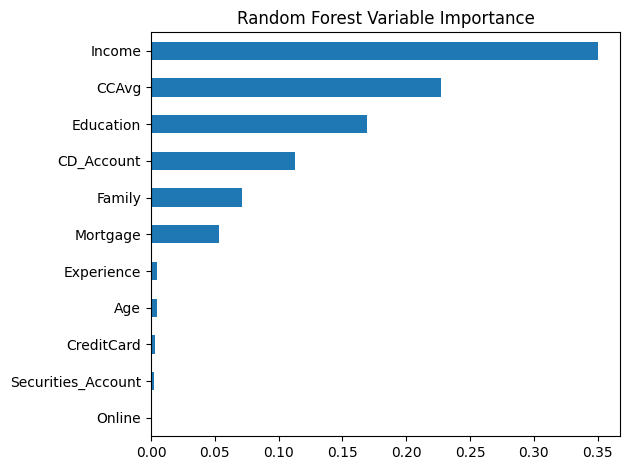

In [55]:
import seaborn as sns

# Get important variables for random forest and decision trees
rf_importances = rf.feature_importances_

# Important features
imp_rf_features = pd.DataFrame({'feature': bank_std_train.columns, 'rf_importance': rf_importances})

# Sort variables according to their importance scores
imp_rf_features_sort = imp_rf_features.sort_values(by="rf_importance", ascending=True)

# Plotting random forest variable importance
imp_rf_features_sort.plot(kind='barh', x='feature', legend=False)
plt.title("Random Forest Variable Importance")
plt.ylabel("")
plt.tight_layout()
plt.show()

## $\color{red}{\text{Model Diagnostics on Testing Data}}$

### $\color{blue}{\text{Model Predictions}}$

1. Using the **testing data**, predict whether an individual will be approved for a **Personal_Loan**
  - This is prediction on unseen data

In [62]:
# Get classes predicted by SVM on testing data
svm_class = svm.predict(bank_std_test)

# Get classes predicted by random forest on testing data
knn_class = knn.predict(bank_std_test)

# Get classes predicted by random forest on testing data
rf_class = rf.predict(bank_std_test)

# Get classes predicted by logistic regression on testing data
logit_class = logit.predict(bank_std_test)

# Get classes predicted by MLP on test data
mlp_class = mlp.predict(bank_std_test)

### $\color{blue}{\text{Accuracy and Misclassification Rate}}$
1. Provide the model's accuracy rate - what does it tell you?
2. Provide the model's misclassification rate - what does it tell you?

In [63]:
from sklearn.metrics import accuracy_score

# Accuracy rate for LDA and logistic regression
svm_accuracy = accuracy_score(test_y, svm_class)
rf_accuracy = accuracy_score(test_y, rf_class)
logit_accuracy = accuracy_score(test_y, logit_class)
knn_accuracy = accuracy_score(test_y, knn_class)
mlp_accuracy = accuracy_score(test_y, mlp_class)

# Get misclassification rate
svm_misclass = round(1 - svm_accuracy, 4)
rf_misclass = round(1 - rf_accuracy, 4)
logit_misclass = round(1 - logit_accuracy, 4)
knn_misclass = round(1 - knn_accuracy, 4)
mlp_misclass = round(1 - mlp_accuracy, 4)

print("*********************** ACCURACY RATES ***********************")
print("Accuracy rate for SVM:", svm_accuracy)
print("Accuracy rate for RF:", rf_accuracy)
print("Accuracy rate for kNN:", knn_accuracy)
print("Accuracy rate for logistic regression:", logit_accuracy)
print("Accuracy rate for MLP:", mlp_accuracy)

print("\n*********************** MISCLASSIFICATION RATES ***********************")
print("Misclassification rate for SVM:", svm_misclass)
print("Misclassification rate for RF:", rf_misclass)
print("Misclassification rate for kNN:", knn_misclass)
print("Misclassification rate for logistic regression:", logit_misclass)
print("Misclassification rate for MLP:", mlp_misclass)

*********************** ACCURACY RATES ***********************
Accuracy rate for SVM: 0.973
Accuracy rate for RF: 0.945
Accuracy rate for kNN: 0.96
Accuracy rate for logistic regression: 0.954
Accuracy rate for MLP: 0.977

*********************** MISCLASSIFICATION RATES ***********************
Misclassification rate for SVM: 0.027
Misclassification rate for RF: 0.055
Misclassification rate for kNN: 0.04
Misclassification rate for logistic regression: 0.046
Misclassification rate for MLP: 0.023


### $\color{blue}{\text{ROC Curve}}$
1. Provide the ROC curve and comment on it

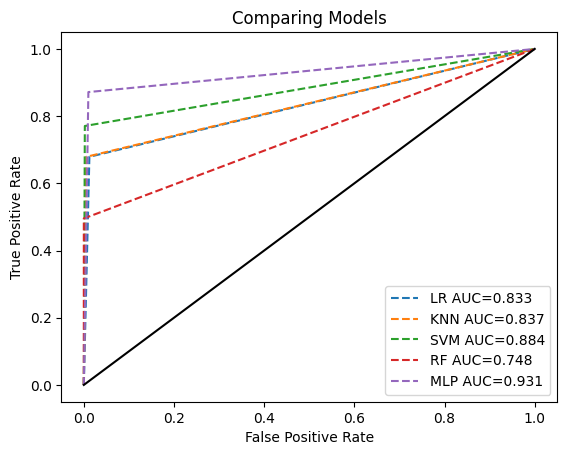

In [64]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Calculate AUC for test data
logit_auc = roc_auc_score(test_y, logit_class)
knn_auc = roc_auc_score(test_y, knn_class)
svm_auc = roc_auc_score(test_y, svm_class)
rf_auc = roc_auc_score(test_y, rf_class)
mlp_auc = roc_auc_score(test_y, mlp_class)

# calculate fpr and tpr for all models
logit_fpr, logit_tpr, _ = roc_curve(test_y, logit_class)
knn_fpr, knn_tpr, _ = roc_curve(test_y, knn_class)
svm_fpr, svm_tpr, _ = roc_curve(test_y, svm_class)
rf_fpr, rf_tpr, _ = roc_curve(test_y, rf_class)
mlp_fpr, mlp_tpr, _ = roc_curve(test_y, mlp_class)

# Plotting
plt.plot(logit_fpr, logit_tpr, linestyle='--', label="{}{:.3f}".format("LR AUC=", logit_auc))
plt.plot(knn_fpr, knn_tpr, linestyle='--', label="{}{:.3f}".format("KNN AUC=", knn_auc))
plt.plot(svm_fpr, svm_tpr, linestyle='--', label="{}{:.3f}".format("SVM AUC=", svm_auc))
plt.plot(rf_fpr, rf_tpr, linestyle='--', label="{}{:.3f}".format("RF AUC=", rf_auc))
plt.plot(mlp_fpr, mlp_tpr, linestyle='--', label="{}{:.3f}".format("MLP AUC=", mlp_auc))
plt.plot([0, 1], [0, 1], linestyle='solid', c='k')

plt.title("Comparing Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()

For the Presentation:

- Do the weakest model as a baseline

- Then for each better model, show the percent change in AUC to show how **much** better this model is

### $\color{blue}{\text{Learning Curves}}$
1. Provides an indication of overfitting or underfitting
  - Key idea: Can the model "hold its own" on new data

/Users/dB/Documents/repos/github/bint-capstone/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/dB/Documents/repos/github/bint-capstone/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


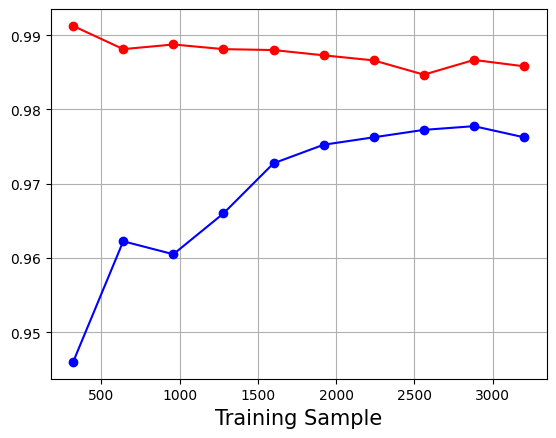

In [65]:
from sklearn.model_selection import learning_curve

size, train_scores, test_scores = learning_curve(estimator=mlp, 
                                                 X=bank_std_train, 
                                                 y=train_y, 
                                                 train_sizes=np.linspace(.1,1,10),cv=5,
                                                 n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(size, train_mean, color='r',marker='o',label='Train accuracy')
plt.plot(size, test_mean, color='b',marker='o',label='Train accuracy')
plt.xlabel('Training Sample', fontsize=15)
plt.grid()
plt.show()

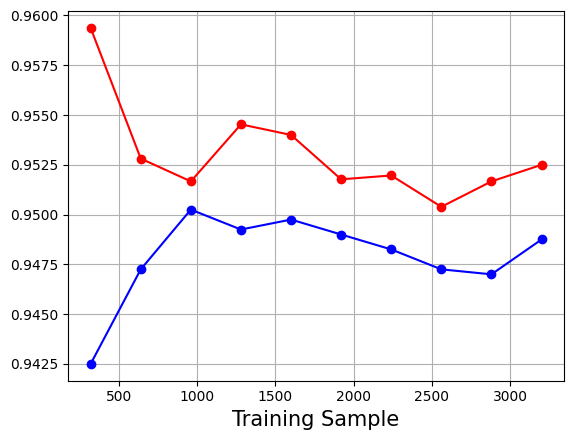

In [66]:
from sklearn.model_selection import learning_curve

size, train_scores, test_scores = learning_curve(estimator=rf, 
                                                 X=bank_std_train, 
                                                 y=train_y, 
                                                 train_sizes=np.linspace(.1,1,10),cv=5,
                                                 n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(size, train_mean, color='r',marker='o',label='Train accuracy')
plt.plot(size, test_mean, color='b',marker='o',label='Train accuracy')
plt.xlabel('Training Sample', fontsize=15)
plt.grid()
plt.show()

The differences in learning curves between these modesl show that the testing accuracy (blue curve) for MLP improves steadily, but potentially with more data that accuracy could decrease. In contrast, the testing accuracy for the RF model is all over the place in comparison, without a steady improvement rate.